In [ ]:
import pandas as pd
studentsperf_df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
studentsperf_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Для каждого пола найти среднюю оценку по трем предметам. Для этого нужно получить датафрейм с тремя столбцами - средняя оценка math, средняя оценка reading, средняя оценка writing, и двумя строками - male и female (их нужно сделать индексами). Построить plot диаграмму с двуми линиями(т.е. два пола)

In [ ]:
all_gender = studentsperf_df['gender'].unique()
all_gender

array(['female', 'male'], dtype=object)

In [ ]:
result = pd.DataFrame()
for gender in all_gender:
    math_avg = studentsperf_df[studentsperf_df['gender'] == gender]['math score'].mean()
    reading_avg = studentsperf_df[studentsperf_df['gender'] == gender]['reading score'].mean()
    writing_avg = studentsperf_df[studentsperf_df['gender'] == gender]['writing score'].mean()
    agg = pd.Series({'math' : math_avg, 'reading' : reading_avg, 'writing' : writing_avg })
    agg['gender'] = gender
    result = pd.concat([result, pd.DataFrame([agg])])
    print(result)


        math    reading    writing  gender
0  63.633205  72.608108  72.467181  female
        math    reading    writing  gender
0  63.633205  72.608108  72.467181  female
0  68.728216  65.473029  63.311203    male


In [ ]:
result.set_index('gender', inplace = True)

In [ ]:
result

,math,reading,writing
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Axes: xlabel='gender'>

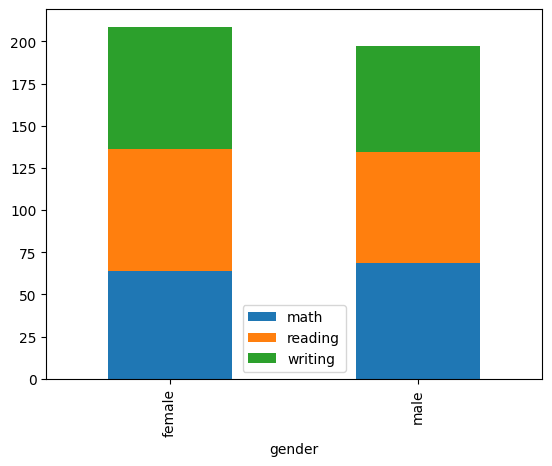

In [ ]:
from matplotlib import pyplot as plt
result.plot(kind = 'bar', stacked = True)

2) Для каждой группы (group A, group B и т.д.) выясните кол-во состоящих в них парней и девушек. Результат получить в виде DataFrame где индексом будет название группы, а в двух столбцах будет кол-во людей разных полов. Построить соответствующую bar-диаграмму

In [ ]:
all_group = studentsperf_df['race/ethnicity'].unique()
all_group

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
result = pd.DataFrame()

for group in all_group:
  gender_number = studentsperf_df[studentsperf_df['race/ethnicity'] == group]['gender'].count()
  agg = pd.Series({'gender_number' : gender_number })
  agg['group'] = group
  result = pd.concat([result, pd.DataFrame([agg])])
  print(result)

   gender_number    group
0            190  group B
   gender_number    group
0            190  group B
0            319  group C
   gender_number    group
0            190  group B
0            319  group C
0             89  group A
   gender_number    group
0            190  group B
0            319  group C
0             89  group A
0            262  group D
   gender_number    group
0            190  group B
0            319  group C
0             89  group A
0            262  group D
0            140  group E


In [ ]:
result.set_index('group', inplace = True)

In [ ]:
result

,gender_number
group,
group B,190
group C,319
group A,89
group D,262
group E,140


<Axes: xlabel='group'>

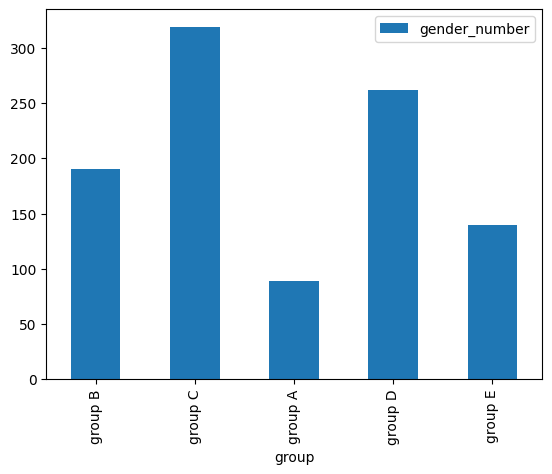

In [ ]:
from matplotlib import pyplot as plt
result.plot(kind = 'bar')


3) Добавьте столбец total_score, в который положите сумму баллов для каждого ученика (math+reading+writing)

In [ ]:
studentsperf_df['total_score'] = studentsperf_df['math score'] + studentsperf_df['reading score'] + studentsperf_df['writing score']
studentsperf_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


3.1) Для каждого уровня образования (parental level of education) рассчитайте средний total_score и постройте bar-диаграмму:

In [ ]:
education = studentsperf_df['parental level of education'].unique()
education

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
result = pd.DataFrame()

for edu in education:
  total_score = studentsperf_df[studentsperf_df['parental level of education'] == edu]['total_score'].mean()
  agg = pd.Series({'total_score' : total_score})
  agg['education'] = edu
  result = pd.concat([result, pd.DataFrame([agg])])
  print(result)

   total_score          education
0   215.771186  bachelor's degree
   total_score          education
0   215.771186  bachelor's degree
0   205.429204       some college
   total_score          education
0   215.771186  bachelor's degree
0   205.429204       some college
0   220.796610    master's degree
   total_score           education
0   215.771186   bachelor's degree
0   205.429204        some college
0   220.796610     master's degree
0   208.707207  associate's degree
   total_score           education
0   215.771186   bachelor's degree
0   205.429204        some college
0   220.796610     master's degree
0   208.707207  associate's degree
0   189.290816         high school
   total_score           education
0   215.771186   bachelor's degree
0   205.429204        some college
0   220.796610     master's degree
0   208.707207  associate's degree
0   189.290816         high school
0   195.324022    some high school


In [ ]:
result.set_index('education', inplace = True)
result

,total_score
education,
bachelor's degree,215.771186
some college,205.429204
master's degree,220.796610
associate's degree,208.707207
high school,189.290816
some high school,195.324022


<Axes: xlabel='education'>

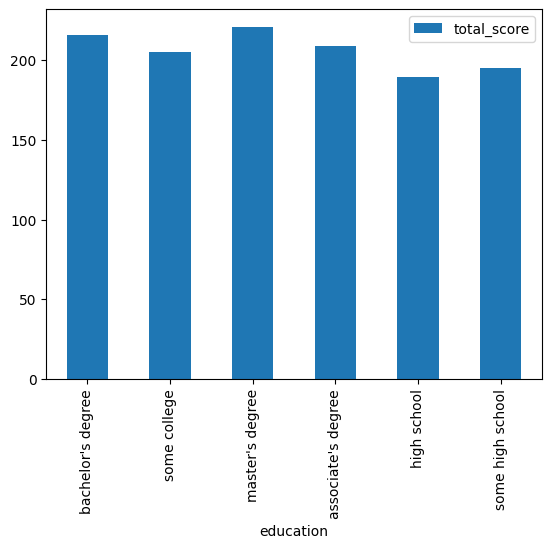

In [ ]:
from matplotlib import pyplot as plt
result.plot(kind = 'bar')

3.2) Разбейте датафрэйм на несколько групп в зависимости от total_score: >90% от максимально возможного балла, 80%-90%, 65%-80%, < 65%

In [ ]:
studentsperf_df[studentsperf_df['total_score']] > 90

KeyError: "None of [Index([218, 247, 278, 148, 229, 232, 275, 122, 195, 148,\n       ...\n       242, 225, 207, 208, 188, 282, 172, 195, 223, 249],\n      dtype='int64', length=1000)] are in the [columns]"

В каждой из полученных групп найдите самый часто встречаемый уровень образования parental level of education